In [3]:
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Get the short name of the month
month_short_name = current_date.strftime('%b').upper()
p=month_short_name
print(p)

JAN


In [6]:
import pyodbc
import time
import pandas as pd
time.clock = time.time
cnxn2 = pyodbc.connect('Driver={SQL Server};'
                      'Server=tevdbn-sql-01;'
                      'Database=SysproCompany1;'
                      'Trusted_Connection=yes;'
)

# SQL query
sql_query2 = 'SELECT * FROM [ArCustomer]'
# Execute the query and fetch results into a DataFrame
dfcus= pd.read_sql(sql_query2, cnxn2)
# Close the connection
cnxn2.close()

C:\Users\shraDDhar\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
dict={"DBK281":"MAKRO CENTURION",
"KAF110":"MAKRO WONDERBOOM",
"HVC220":"MAKRO STRUBENS VALLEY",
"KPC102":"GAME BOKSBURG",
"KAF101":"MAKRO VAAL",
"HIR202":"GAME SOWETO",
"HPW300":"MAKRO SPRINGFIELD",
"HIR200":"MAKRO CROWN MINES"}
j={}
for k,v in dict.items():
    b=dfcus.query("Name==@v")['ShortName'].values.tolist()[0]
    j[k]=b

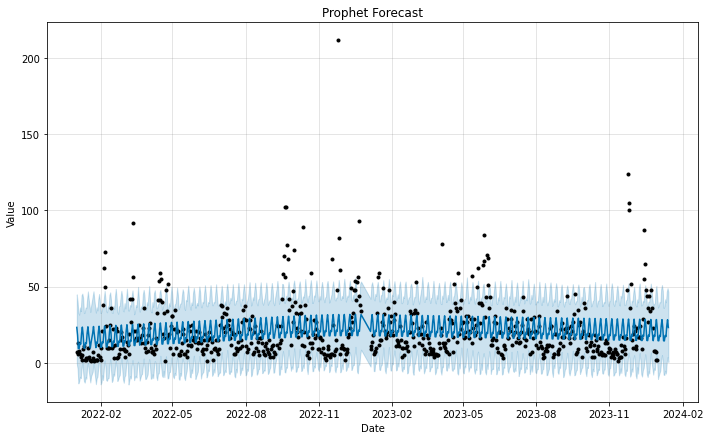

In [25]:
# Plotting forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [8]:
import pyodbc
import time
import pandas as pd
time.clock = time.time
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
cnxn3 = pyodbc.connect('Driver={SQL Server};'
                      'Server=tevdbn-dws-01;'
                      'Database=Staging;'
                      'Trusted_Connection=yes;'
)
for k1,v1 in j.items():
    # SQL query
    sql_query2 = "SELECT * FROM Superman where SalesYear=\'2022\' and SiteCode=\'"+str(v1)+"\' and StockCode=\'"+str(k1)+"\'"
    sql_query3 = "SELECT * FROM Superman where SalesYear=\'2023\' and SiteCode=\'"+str(v1)+"\' and StockCode=\'"+str(k1)+"\'"
    # Execute the query and fetch results into a DataFrame
    dfs1 = pd.read_sql(sql_query2, cnxn3)
    dfs2=pd.read_sql(sql_query3, cnxn3)
    dfsep=dfs1.append(dfs2)
    #dfsep=dfsep.query('MonthShortName==\'DEC\' or MonthShortName==\'NOV\' or MonthShortName==\'OCT\'')
    jansale=dfsep[["Datesid","DatesIdDate","CustomerName","StockCode","ProductClassDescription",'Brand', 'Category','Amount','Type']].query('Type==\'SalesInUnits\'')
    jansale['day']=[int(i[-2:]) for i in jansale['Datesid'].values.tolist()]
    jansale['Amount']=[int(i*-1) if i<0 else i for i in jansale['Amount'].values.tolist()]
    dfo=jansale
    dfo = dfo.rename(columns={'DatesIdDate': 'ds', 'Amount': 'y'})
    dfo['ds'] = pd.to_datetime(dfo['ds'])
    train_data = dfo.iloc[:].fillna(0)
    test_data = dfo.iloc[0:12].fillna(0)
    test_data
    train_data
    # Creating and fitting the Prophet model
    model = Prophet()
    model.fit(train_data)
    # Creating a dataframe for future forecasting
    future = model.make_future_dataframe(periods=14, freq='D')
    # Generating forecast
    forecast = model.predict(future)
    po=forecast[['ds','yhat']].query('ds>2024')
    # SQL query
    sql_query1 = "SELECT * FROM Superman where SalesYear=\'2024\' and MonthShortName=\'JAN\' and SiteCode=\'"+str(v1)+"\' and StockCode=\'"+str(k1)+"\'"
    # Execute the query and fetch results into a DataFrame
    dfp = pd.read_sql(sql_query1, cnxn3)
    ansale=dfp[["Datesid","DatesIdDate","CustomerName","StockCode","ProductClassDescription",'Brand', 'Category','Amount','Type']].query('Type==\'SalesInUnits\'')
    ansale['day']=[int(i[-2:]) for i in ansale['Datesid'].values.tolist()]
    ansale['Amount']=[int(i*-1) if i<0 else i for i in ansale['Amount'].values.tolist()]
    forecast.query('ds>2024')
    po.rename(columns={'ds': 'DatesIdDate'}, inplace=True)
    df=po.merge(ansale)
    df['Percentage_Difference'] = ((df['yhat'] - df['Amount']) / df['yhat']) * 100
    df.to_excel(str(v1)+str(k1)+".xlsx")
# Close the connection
cnxn3.close()

C:\Users\shraDDhar\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\shraDDhar\AppData\Roaming\Python\Python38\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\shraDDhar\AppData\Local\Temp\ipykernel_38136\1973607266.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfsep=dfs1.append(dfs2)


ValueError: Dataframe has less than 2 non-NaN rows.